Importing gempy



In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')
import gempy as gp

# Aux imports
import numpy as np
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import gstools as gs
import pyvista as pv
import pyvistaqt as pvqt
import PVGeo
import glob
import random
from tqdm import tqdm

np.random.seed(1515)
pd.set_option('precision', 2)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\pasha\python\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


No module named 'osgeo'


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We import a model from an existing folder, representing a subduction
zone with onlap relationships. The theano function is automatically
recombined to allow changes.




In [2]:
#define resolution and mesh size
reso=[50, 50, 50]
mesh_size = reso[0]*reso[1]*reso[2]
extent=[0, 1494, 0, 1000, -1119, 0]
print(' mesh size: ' + str(mesh_size))

 mesh size: 125000


In [3]:
surface_points=pd.read_csv('data_all_test50.csv')
orientations=pd.read_csv('data_all_test50.csv')

In [4]:
geo_data = gp.create_data('foresets', extent=extent, resolution=reso)
geo_data.set_surface_points(surface_points)
geo_data.set_orientations(orientations)
geo_data.resolution=reso

Active grids: ['regular']


In [5]:
geo_data.get_data()

X    Y       Z    smooth                 surface  \
surface_points 0   1060.74  650 -100.71  2.00e-06            Premine topo   
               1    672.30  270  -78.33  2.00e-06            Premine topo   
               2    313.74   50 -167.85  2.00e-06            Premine topo   
               3    971.10  450 -100.71  2.00e-06            Premine topo   
               4    672.30  570 -100.71  2.00e-06            Premine topo   
...                    ...  ...     ...       ...                     ...   
orientations   67   971.10  450 -951.15  1.00e-02  Equigranular Monzonite   
               68  1120.50  130 -593.07  1.00e-02  Equigranular Monzonite   
               69   403.38   10 -593.07  1.00e-02  Equigranular Monzonite   
               70  1150.38  150 -570.69  1.00e-02  Equigranular Monzonite   
               71  1150.38   70 -570.69  1.00e-02  Equigranular Monzonite   

                    G_x   G_y   G_z  
surface_points 0    NaN   NaN   NaN  
               1    NaN   NaN   NaN  
               2    NaN   NaN   NaN  
               3    NaN   NaN   NaN  
               4    NaN   NaN   NaN  
...                 ...   ...   ...  
orientations   67 -0.95 -0.30  0.09  
               68 -0.83  0.05  0.56  
               69  0.77 -0.15 -0.61  
               70 -0.83 -0.10  0.55  
               71 -0.52 -0.02  0.85  

[144 rows x 8 columns]

In [6]:
gp.map_stack_to_surfaces(geo_data, {"Strat_Series1": ('Premine topo'),
                                    "Strat_Series2":('Quartz monzonite porphyry'),
                                    "Strat_Series3":('Equigranular Monzonite')})
geo_data.add_series("Basement")
geo_data.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Premine topo,Strat_Series1,1,#015482,1
1,Quartz monzonite porphyry,Strat_Series2,1,#9f0052,2
2,Equigranular Monzonite,Strat_Series3,1,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [7]:
geo_data.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series1,1,Erosion,True,False,False
Strat_Series2,2,Erosion,True,False,False
Strat_Series3,3,Erosion,True,False,False
Basement,4,Erosion,False,False,False


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


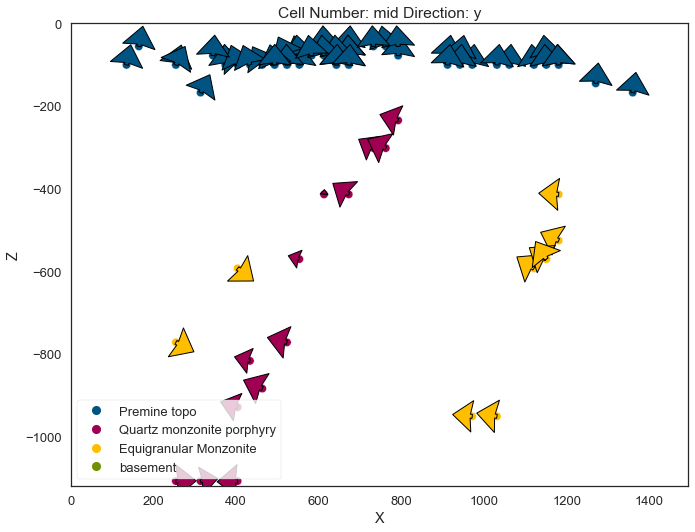

In [8]:
gp.plot_2d(geo_data, figsize=(10,10))

In [9]:
geo_data.set_topography()

#geo_data.set_topography(source='random', fd=1.5, d_z=np.array([-50, 0]), resolution=np.array([400, 400]))
#geo_model._grid.topography.save('test_topo')
#geo_model.set_topography(source='saved', filepath='test_topo.npy')

[-223.8    0. ]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   14.94      ,    10.        , -1107.81      ],
       [   14.94      ,    10.        , -1085.43      ],
       [   14.94      ,    10.        , -1063.05      ],
       ...,
       [ 1494.        ,   959.18367347,  -182.68261663],
       [ 1494.        ,   979.59183673,  -178.89757755],
       [ 1494.        ,  1000.        ,  -178.44041931]])

In [10]:
interp_data = gp.set_interpolator(geo_data, compile_theano=True,theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range                 2117.59
$C_o$                106766.6
drift equations  [3, 3, 3, 3]


In [11]:
%%time
sol = gp.compute_model(geo_data, compute_mesh=True, debug=False)

Wall time: 11.6 s


C:\Users\pasha\python\lib\site-packages\gempy\core\solution.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


C:\Users\pasha\python\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


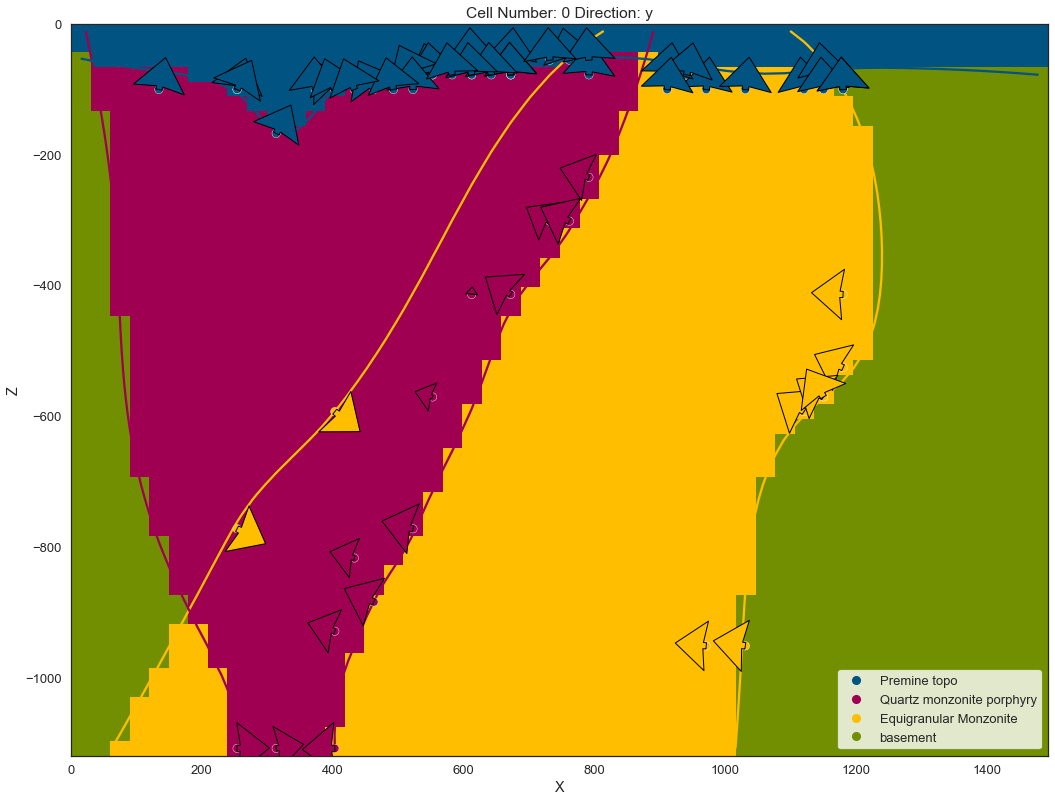

In [12]:
gp.plot_2d(geo_data, cell_number=0, show_data=True, figsize=(15,15))

sphinx_gallery_thumbnail_number = 7



In [103]:
p3d = gp.plot_3d(geo_data, plotter_type='background', show_lith=True, show_surfaces=True,  show_data=False, image=False,
                 show_topography=True,
                 kwargs_plot_structured_grid={'opacity': .7})

gp.save_model(geo_data)

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


True

In [13]:
### User-defined functions
def extract_domain(sol, unit):
    '''
    Extract domain coordinates from gempy model by unit name
    arguments:
        sol: Gempy solution object.
        unit: gempy unit by index
    returns:
        dom_x, dom_y, dom_z: coordinates of domain
    '''

    # new version with rounding, definitely necessary
    rounded_lithblock = sol.lith_block.round(0)
    rounded_lithblock = rounded_lithblock.astype(int)

    # mask by array of input surfaces (by id, can be from different series)
    mask = np.isin(rounded_lithblock, unit)

    # get coordinates by mask
    #krig_lith = sol.lith_block[mask]
    dom_grid = sol.grid.values[:mesh_size][mask]

    dom_x = dom_grid[:,0]
    dom_y = dom_grid[:,1]
    dom_z = dom_grid[:,2]

    return dom_x, dom_y, dom_z

In [14]:
unit_count=int(np.max(sol.lith_block.round(0)))
unit_count

4

### Geostatistics and Kriging

In [15]:
df =pd.read_csv('3_kriging_Cu_100.csv')
df

,Unnamed: 0,X,Y,Z,grade,borehole
0,0,1240.02,370.0,-1107.81,0.47,1.0
1,10,1240.02,370.0,-884.01,0.47,1.0
2,20,1240.02,370.0,-660.21,0.47,1.0
3,30,1240.02,370.0,-436.41,0.47,1.0
4,40,1240.02,370.0,-212.61,0.47,1.0
...,...,...,...,...,...,...
436,4360,1180.26,810.0,-167.85,0.48,99.0
437,4370,1449.18,950.0,-906.39,0.48,100.0
438,4380,1449.18,950.0,-682.59,0.48,100.0
439,4390,1449.18,950.0,-458.79,0.48,100.0


In [16]:
# load grade input data (conditioning data)
n=len(df.iloc[:,1])
x = df.iloc[:n,1]
y = df.iloc[:n,2]
z = df.iloc[:n,3]
cond_pos = np.array([x,y,z])
cond_val = df.iloc[:n,4]

In [17]:
# This is to extract smaller domains from gempy by 

domain_x, domain_y, domain_z = extract_domain(sol, (2,3,4))

In [18]:
# grid coordinate preparation
coordinates = np.array([domain_x, domain_y, domain_z])
coordinates = coordinates.swapaxes(0,1)
    
# This is where the magic happens - GStools offers a lot of options, here a simple version with isotropic range
#(CondSRF - conditional spatial random fields)
model = gs.Exponential(dim=3, var=np.var(cond_val), len_scale=200)
krige = gs.krige.Ordinary(model, cond_pos, cond_val)
cond_srf = gs.CondSRF(krige)

# perform kriging
krige((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')
# alternatively fior SGS
#cond_srf((coordinates[:,0],coordinates[:,1], coordinates[:,2]), mesh_type='unstructured')

# just convenience rename
field = krige
# alternatively for SGS
#field = cond_srf

In [19]:
# convert to pyvista mesh
pc = field.to_pyvista()

In [20]:
# 3D plotting example
spacing = lambda arr: np.unique(np.diff(np.unique(arr)))
voxelsize = spacing(pc.points[:,0]), spacing(pc.points[:,1]), spacing(pc.points[:,2])

pc = pc.cast_to_unstructured_grid()

grade = PVGeo.filters.VoxelizePoints(dx=voxelsize[0][0], dy=voxelsize[1][0], dz=voxelsize[2][0], estimate=False).apply(pc)
    
#p.add_mesh(grid, opacity=1, show_edges=False, lighting=False, cmap=cmap)
p = pvqt.BackgroundPlotter()
gpv = gp.plot_3d(geo_data, plotter_type='background', show_data=False, show_lith=True, show_surfaces=True,
                kwargs_plot_structured_grid={'opacity': .8})
gpv.p.add_mesh(grade, opacity=1, clim=[0,1.1], show_edges=False, lighting=False, cmap="terrain")

C:\Users\pasha\python\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


### Calculating Cu ore volume

In [21]:
#define grade intervals and check the count of voxels corresponding to the same interval
ore_interval1=[]
ore_interval2=[]
ore_interval3=[]
ore_dict={}
for index in tqdm(range(0, len(grade.active_scalars))):
    #for Cu Horizon I:
    if grade.active_scalars[index]>0.7:
        ore_interval1.append(grade.active_scalars[index])
        ore_dict.update({1: ore_interval1})
    #for Cu Horizon II:
    elif 0.7>grade.active_scalars[index]>0.6:        
        ore_interval2.append(grade.active_scalars[index])
        ore_dict.update({2: ore_interval2})
        
    #for Cu Horizon III:
    elif 0.5>grade.active_scalars[index]>0.43:        
        ore_interval3.append(grade.active_scalars[index])
        ore_dict.update({3: ore_interval3})
        
#calculate volume of total voxels corresponding to a certain ore grade interval
voxel_volume=((extent[1]-extent[0])/reso[0])*((extent[3]-extent[2])/reso[1])*((extent[5]-extent[4])/reso[2])

for i in range(1,4):
    ore_avrg_grade=np.mean(ore_dict[i])
    volume=len(ore_dict[i])*(voxel_volume)
    print("Horizon{} = ".format(i),volume)
    print("Average ore grade=", ore_avrg_grade)

100%|████████████████████████████████| 914296/914296 [11:29<00:00, 1326.81it/s]

Horizon1 =  11018741.526
Average ore grade= 0.7348306785555971
Horizon2 =  33502591.44
Average ore grade= 0.6424914640159453
Horizon3 =  1322536530.312
Average ore grade= 0.4776780793441629


### Calculating Au ore volume

In [24]:
#define grade intervals and check the count of voxels corresponding to the same interval
ore_interval1=[]
ore_interval2=[]
ore_interval3=[]
ore_dict={}
for index in tqdm(range(0, len(grade.active_scalars))):
    #for Cu Horizon I:
    if 0.3>grade.active_scalars[index]>0.1:
        ore_interval1.append(grade.active_scalars[index])
        ore_dict.update({1: ore_interval1})
    #for Cu Horizon II:
    elif 0.6>grade.active_scalars[index]>0.3:        
        ore_interval2.append(grade.active_scalars[index])
        ore_dict.update({2: ore_interval2})
        
    #for Cu Horizon III:
    elif 1.1>grade.active_scalars[index]>0.6:        
        ore_interval3.append(grade.active_scalars[index])
        ore_dict.update({3: ore_interval3})
        
#calculate volume of total voxels corresponding to a certain ore grade interval
voxel_volume=((extent[1]-extent[0])/reso[0])*((extent[3]-extent[2])/reso[1])*((extent[5]-extent[4])/reso[2])

for i in range(1,4):
    ore_avrg_grade=np.mean(ore_dict[i])
    volume=len(ore_dict[i])*(voxel_volume)
    print("Horizon{} = ".format(i),volume)
    print("Average ore grade=", ore_avrg_grade)

100%|████████████████████████████████| 268495/268495 [02:16<00:00, 1967.02it/s]

Horizon1 =  442276001.658
Average ore grade= 0.14774105730151613
Horizon2 =  6158859.624
Average ore grade= 0.374710201170932
Horizon3 =  128727.522
Average ore grade= 0.6412193820874152


### Compare the data frames with with identical cells

In [15]:
unit=range(0,unit_count+1)
for index in unit:
    domain_x, domain_y, domain_z = extract_domain(sol, (unit[index+1]))
    coordinates = np.array([domain_x, domain_y, domain_z])
    coordinates = coordinates.swapaxes(0,1)
    data=pd.DataFrame(coordinates, columns=['X','Y','Z'])
    data.loc[:, 'formation'] =float(unit[index+1])
    data.to_csv(r'data_extracted/reconstructed/unit_{}.csv'.format(unit[index+1]), mode="w", index=False)

IndexError: range object index out of range

In [16]:
# if you want to join all files in the same folder
path =r'data_extracted/reconstructed/'

filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
reconstructed = pd.concat(dfs, ignore_index=True)
#df.drop(df.columns[[0]], axis=1, inplace=True)
reconstructed

,X,Y,Z,formation
0,14.94,10.0,-33.57,1.0
1,14.94,10.0,-11.19,1.0
2,14.94,30.0,-55.95,1.0
3,14.94,30.0,-33.57,1.0
4,14.94,30.0,-11.19,1.0
...,...,...,...,...
124995,1479.06,990.0,-279.75,4.0
124996,1479.06,990.0,-257.37,4.0
124997,1479.06,990.0,-234.99,4.0
124998,1479.06,990.0,-212.61,4.0


In [17]:
# if you want to join all files in the same folder
path =r'data_extracted/ideal/'

filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
ideal = pd.concat(dfs, ignore_index=True)
#df.drop(df.columns[[0]], axis=1, inplace=True)
ideal

,X,Y,Z,formation
0,14.94,10.0,-78.33,1.0
1,14.94,10.0,-55.95,1.0
2,14.94,10.0,-33.57,1.0
3,14.94,10.0,-11.19,1.0
4,14.94,30.0,-78.33,1.0
...,...,...,...,...
124995,1479.06,990.0,-302.13,4.0
124996,1479.06,990.0,-279.75,4.0
124997,1479.06,990.0,-257.37,4.0
124998,1479.06,990.0,-234.99,4.0


In [18]:
a=ideal.merge(reconstructed, left_on=('X','Y','Z','formation'), right_on=('X','Y','Z','formation'), how='inner')
similarity=(len(a)/len(ideal))*100
similarity

91.904